In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [9]:
df = pd.read_csv("oral-bioavailability.csv")
print(f'The dataset contains {df.shape} rows and columns.') # Checking the shape of the dataframe.
df.fillna(0, inplace=True) # Filling 0 for cells containig no data.
df['value'] = pd.to_numeric(df['value']) # Converting values present as string yo numeric values. 

The dataset contains (13836, 45) rows and columns.


In [10]:
# Adding missing species to target_organism column from assay description column.
df.loc[df['assay_description'].str.contains('rat'), 'target_organism'] = 'Rattus norvegicus'
df.loc[df['assay_description'].str.contains('mouse'), 'target_organism'] = 'Mus musculus'
df.loc[df['assay_description'].str.contains('mice'), 'target_organism'] = 'Mus musculus'
df.loc[df['assay_description'].str.contains('human'), 'target_organism'] = 'Homo sapiens'
df.loc[df['assay_description'].str.contains('monkey'), 'target_organism'] = 'monkey'
df.loc[df['assay_description'].str.contains('dog'), 'target_organism'] = 'Canis familiaris'
df.loc[df['assay_description'].str.contains('guinea pig'), 'target_organism'] = 'Cavia porcellus'
df.loc[df['assay_description'].str.contains('ferret'), 'target_organism'] = 'Mustela furo'
df.loc[df['assay_description'].str.contains('marmoset'), 'target_organism'] = 'Callithrix jacchus'
df.loc[df['assay_description'].str.contains('cat'), 'target_organism'] = 'Felis catus'
df.loc[df['assay_description'].str.contains('rabbit'), 'target_organism'] = 'Oryctolagus cuniculus'
df.loc[df['assay_description'].str.contains('pig'), 'target_organism'] = 'SUS'

In [11]:
print(f'The dataset contains {df.shape} rows and columns.') # Checking the shape of the dataframe.
df = df[~df['data_validity_comment'].isin(['Outside typical range','Non standard unit for type'])] # Dropping rows that contin redundant bio-availability values. 
print(f'The dataset contains {df.shape} rows and columns after dropping "F" values out of range.') # Checking the shape of the dataframe.
df = df[df['value'] !=0] # Dropping rows that have a bio-availability value 'F' of 0.
print(f'The dataset contains {df.shape} rows and columns after dropping rows for missing "F values".') # Checking the shape of the dataframe.
df = df[df['target_organism'] !=0] # Dropping rows that has no species info in target organism column.
print(f'The dataset contains {df.shape} rows and columns after dropping rows for unknown species.') # Checking the shape of the dataframe.

The dataset contains (13836, 45) rows and columns.
The dataset contains (13772, 45) rows and columns after dropping "F" values out of range.
The dataset contains (13019, 45) rows and columns after dropping rows for missing "F values".
The dataset contains (12886, 45) rows and columns after dropping rows for unknown species.


SPECIES                   COUNT
-------------------------------
Rattus norvegicus         7228
Mus musculus              2280
Canis familiaris          1717
monkey                     761
Homo sapiens               754
SUS                         50
Mustela furo                29
Mesocricetus auratus        16
Oryctolagus cuniculus       13
Callithrix jacchus          11
Pan troglodytes              7
Equus caballus               5
Cricetinae                   4
Macaca mulatta               4
Canis lupus familiaris       3
Felis catus                  2
Anas platyrhynchos           1
Gallus gallus                1
Name: target_organism, dtype: int64


<AxesSubplot:title={'center':'Data-points for each organism'}>

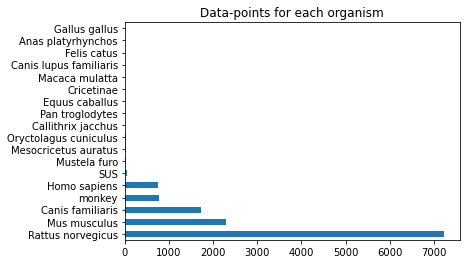

In [12]:
print('SPECIES                   COUNT')
print('-------------------------------')
print(df['target_organism'].value_counts()) # Printing the no of data points for each organism.
df['target_organism'].value_counts().plot(kind='barh', title='Data-points for each organism') # Plotting data points for each organism.

In [13]:
predf = df[df['target_organism'].str.contains('Rattus norvegicus|Mus musculus')] # Retaining data only from rats and mice.
predf = predf.sort_values(by=['value']) # Sorting column with name 'value'.

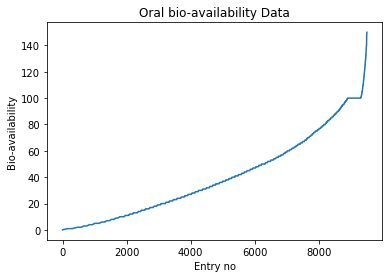

In [14]:
# Plotting Oral bio-availability Data
fig,ax = plt.subplots()
ax.set_title('Oral bio-availability Data')
ax.set_ylabel('Bio-availability')
ax.set_xlabel('Entry no')
y_values = predf['value']
x_values = range(len(y_values))
ax.plot(x_values, y_values)
plt.show()

In [15]:
print(f'The dataset contains {predf.shape} rows and columns.') # Checking the shape of the dataframe.
#predf.to_csv("oral-bioavailability-processed.csv", index=False) #Saving the processed dataset.

The dataset contains (9508, 45) rows and columns.
